In [1]:
from models import build_model, build_pretrained_model
from evaluate import test, train, plot_results
from data import make_dataset
import torch
%matplotlib inline

# specify gpu device
device=1

### Загружаем датасет

Формируем датасет, используя аугментацию: случайные повороты, отражения по горизонтали и нормализацию. Размер обучающей выборки - 60%, валидационной и тестовой по 20%.

In [2]:
#data_path = #your path to clock/crocodile dataset
data_path = '/home/rakova/samsung/'
train_loader, val_loader, test_loader = make_dataset(path=data_path)

### Первая модель

Первую модель обучаем с нуля. В качестве базовой модели была взята [эта](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py), затем я немного модифицировала ее, подобрав гиперпараметры. Нейронная сеть состоит из четырех сверточных слоев с размером ядра 3$\times$3, после которых идет слой MaxPooling и Dropout, и трех полносвязных, в качестве функции активации используется PReLU.  Количество эпох для обучения - 100, размер батча - 20. Оптимизатор - Adam с уменьшающимся learning rate каждые 30 эпох (вначале 0.001). Функция потерь - кросс энтропия. Каждую эпоху сохраняется лучшая текущая модель(с минимальным значением функции потерь по валидационной выборке).

На графиках преведена динамика обучения модели.

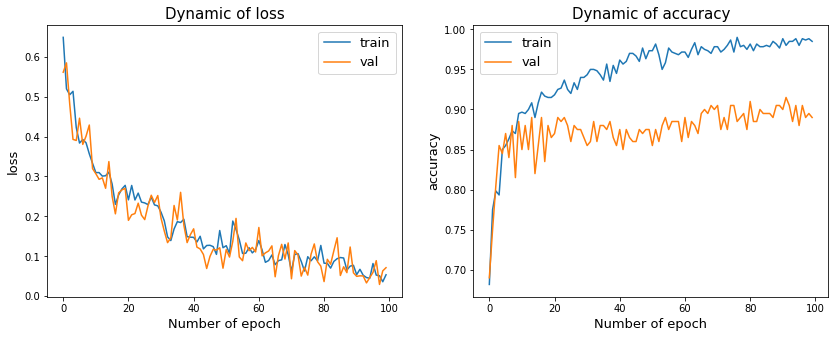

In [3]:
model = build_model(device=device)
train(model, train_loader, val_loader, num_epochs=100, device=device)

In [4]:
model = build_model(device=device)
model.load_state_dict(torch.load('best_model.pt'))
model.cuda(device);

acc_test_1 = test(model, test_loader, device=device)
acc_val_1 = test(model, val_loader, device=device)
acc_train_1 = test(model, train_loader, device=device)

print("Accuracy score для тестовой выборки:\t{:.2f} %".format(
        acc_test_1 * 100))
print("Accuracy score для валидационной выборки:\t{:.2f} %".format(
        acc_val_1 * 100))
print("Accuracy score для обучающей выборки:\t{:.2f} %".format(
        acc_train_1 * 100))

Accuracy score для тестовой выборки:	90.00 %
Accuracy score для валидационной выборки:	89.00 %
Accuracy score для обучающей выборки:	99.17 %


Ниже преведены предсказания сети для тестовой выборки. Красным указаны неверные предсказания.

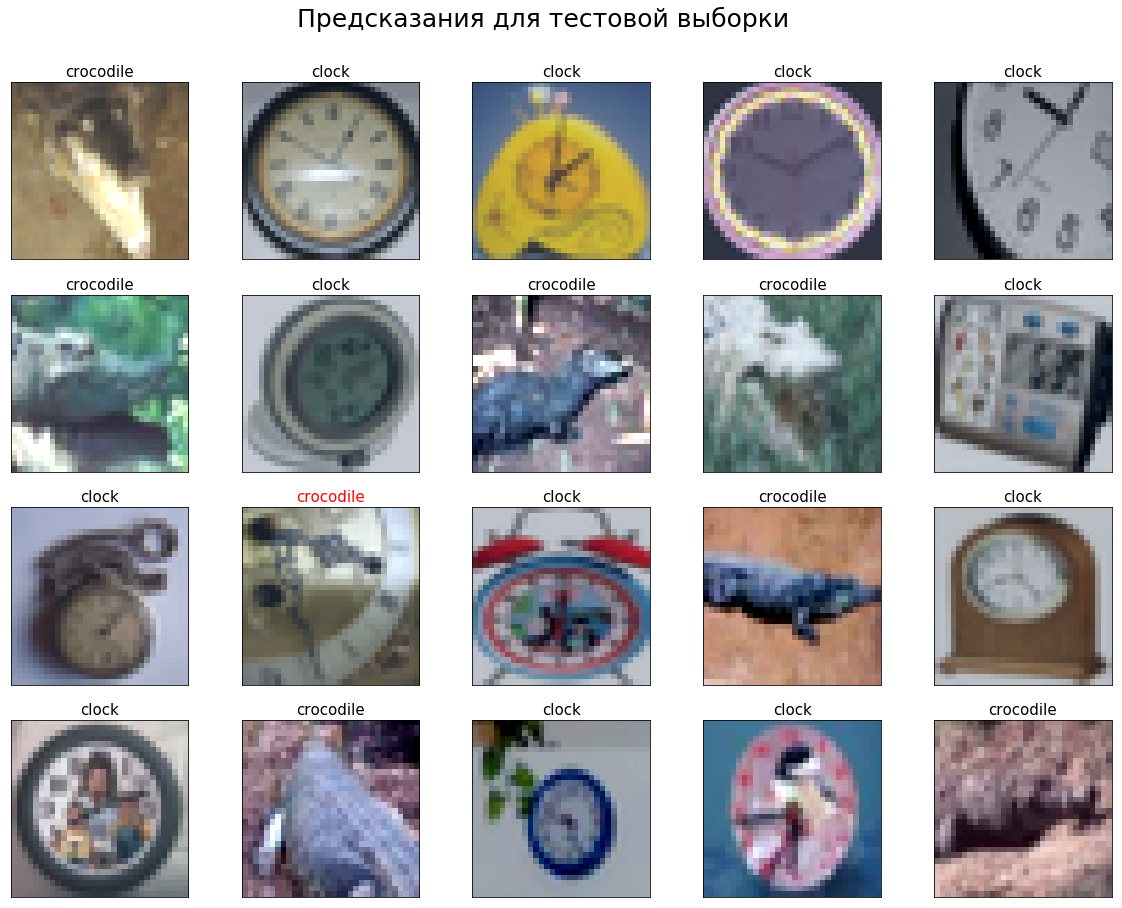

In [5]:
plot_results(model, test_loader, device=device)

### Вторая модель

В качестве второй модели я использовала предобученную нейронную сеть [ResNet-18](https://arxiv.org/pdf/1512.03385.pdf), взяв у нее несколько сверточных слоев и добавив свои полносвязные.  

Количество эпох для обучения - 100, размер батча - 20. Оптимизатор - Adam с уменьшающимся learning rate каждые 30 эпох. Функция потерь - кросс энтропия. Каждую эпоху сохраняется лучшая текущая модель(с минимальным значением функции потерь по валидационной выборке).

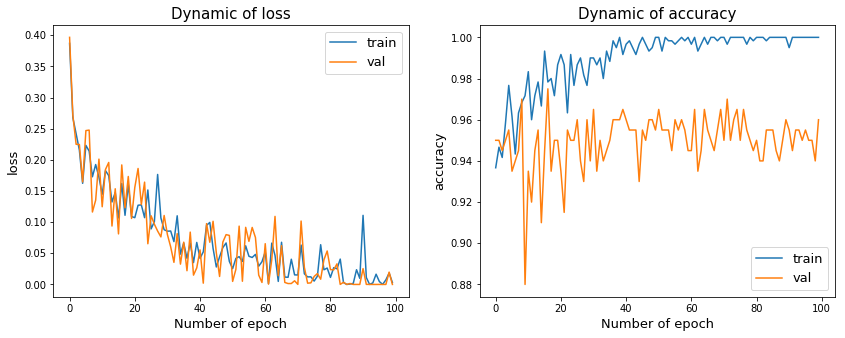

In [6]:
model = build_pretrained_model(device=device)
train(model, train_loader, val_loader, num_epochs=100, device=device)

In [7]:
model = build_pretrained_model(device=device)
model.load_state_dict(torch.load('best_model.pt'))
model.cuda(device);
acc_test_2 = test(model, test_loader, device=device)
acc_val_2 = test(model, val_loader, device=device)
acc_train_2 = test(model, train_loader, device=device)

print("Accuracy score для тестовой выборки:\t{:.2f} %".format(
        acc_test_2 * 100))
print("Accuracy score для валидационной выборки:\t{:.2f} %".format(
        acc_val_2 * 100))
print("Accuracy score для обучающей выборки:\t{:.2f} %".format(
        acc_train_2 * 100))

Accuracy score для тестовой выборки:	95.00 %
Accuracy score для валидационной выборки:	95.00 %
Accuracy score для обучающей выборки:	100.00 %


Ниже преведены предсказания сети для тестовой выборки. Красным указаны неверные предсказания.

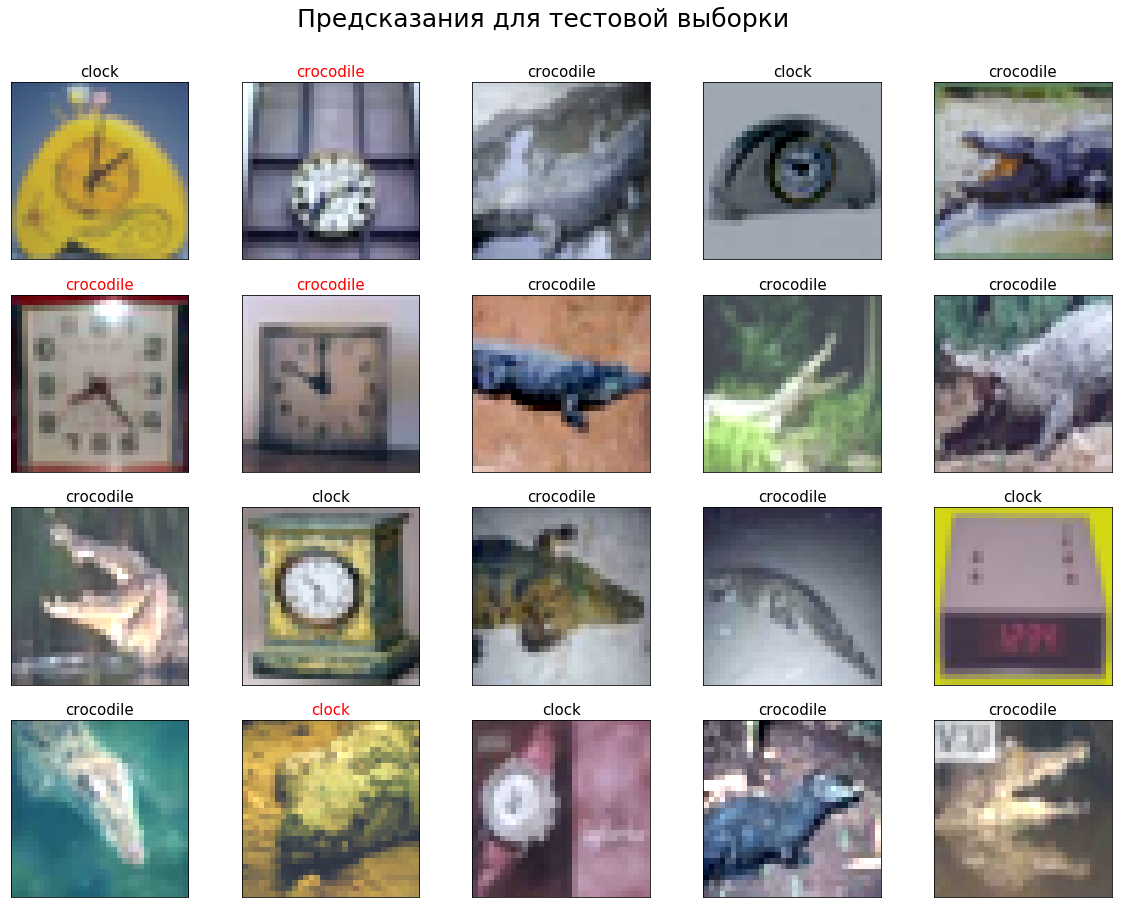

In [8]:
plot_results(model, test_loader, device=device)

### Вывод

Для задачи классификации крокодилов и часов было использовано 2 модели: предобученная и нет. 

__Для первой модели:__

In [9]:
print("Accuracy score для тестовой выборки:\t{:.2f} %".format(
        acc_test_1 * 100))
print("Accuracy score для валидационной выборки:\t{:.2f} %".format(
        acc_val_1 * 100))
print("Accuracy score для обучающей выборки:\t{:.2f} %".format(
        acc_train_1 * 100))

Accuracy score для тестовой выборки:	90.00 %
Accuracy score для валидационной выборки:	89.00 %
Accuracy score для обучающей выборки:	99.17 %


__Для второй модели (предобученной):__

In [10]:
print("Accuracy score для тестовой выборки:\t{:.2f} %".format(
        acc_test_2 * 100))
print("Accuracy score для валидационной выборки:\t{:.2f} %".format(
        acc_val_2 * 100))
print("Accuracy score для обучающей выборки:\t{:.2f} %".format(
        acc_train_2 * 100))

Accuracy score для тестовой выборки:	95.00 %
Accuracy score для валидационной выборки:	95.00 %
Accuracy score для обучающей выборки:	100.00 %


Наилучшие значения метрики для тестовой и  для обучающей выборки достигает предобученная модель. Результаты можно улучшить, если увеличить размер обучающей выборки, например, используя генерирующую сеть или за счет более сложной аугментации данных. Возможно, результаты можно улучшить, если в качестве предобученной модели использовать другую сеть, например, Inception, вместо ResNet18.